In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings ('ignore')

In [2]:
data = pd.read_csv('titanic_train.csv')

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data= data.drop (columns= ['Cabin'], axis=1)

In [9]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [10]:
data['Embarked'].fillna('U', inplace=True)


In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

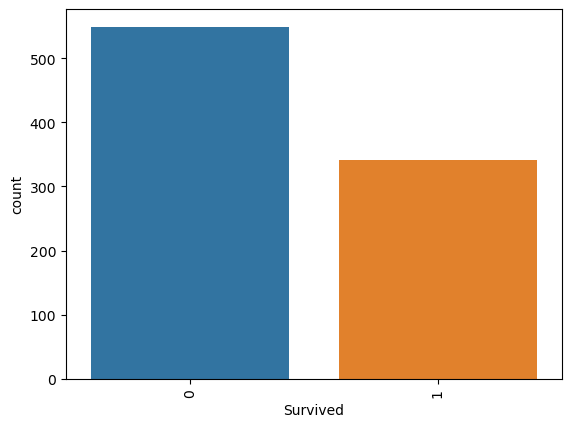

In [13]:
sns.countplot(data=data, x='Survived')
plt.xticks(rotation=90)


In [14]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

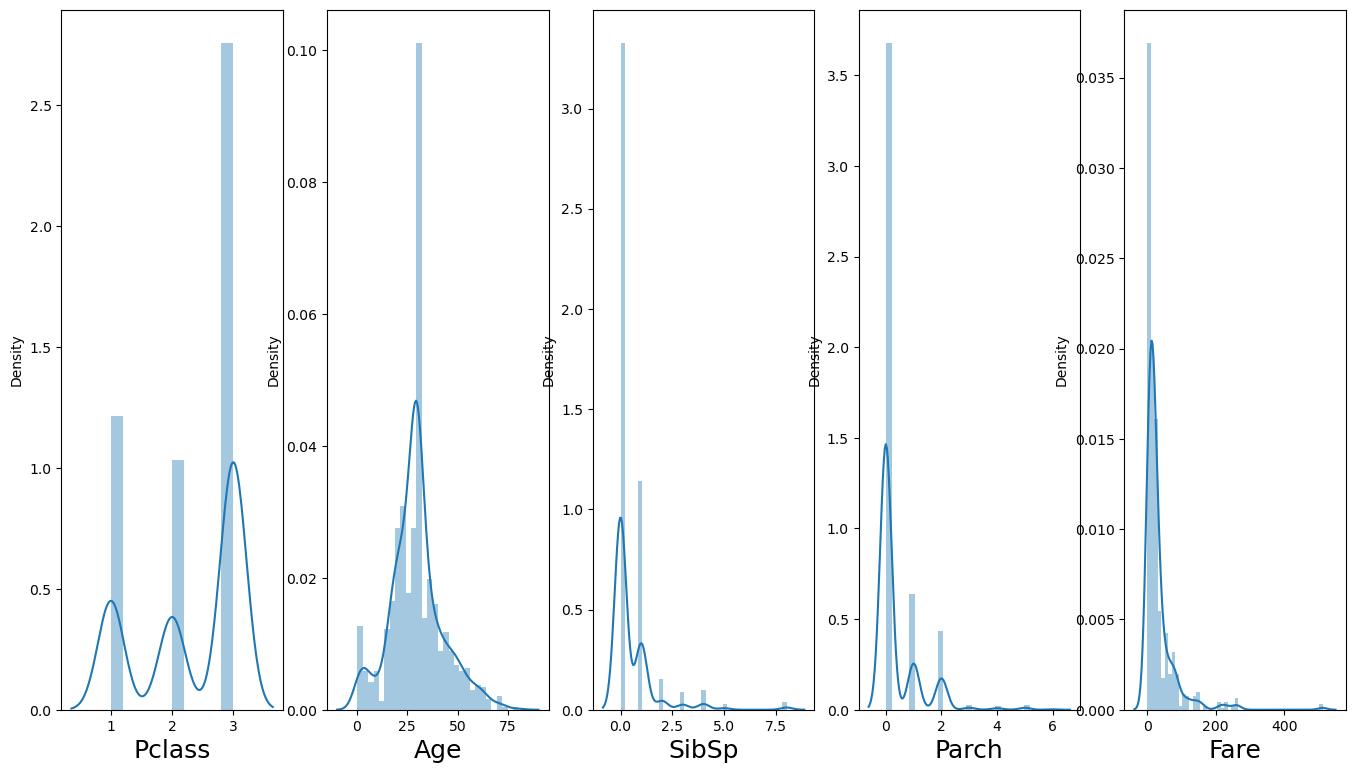

In [15]:
columns= ['Pclass','Age', 'SibSp','Parch', 'Fare']
plotnumber = 1
plt.figure(figsize=(20,20))
for column in columns:
    if plotnumber <= 6:
        ax = plt.subplot(2, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


In [16]:
from scipy.stats import yeojohnson
data['Fare'],_ = yeojohnson(data['Fare'])

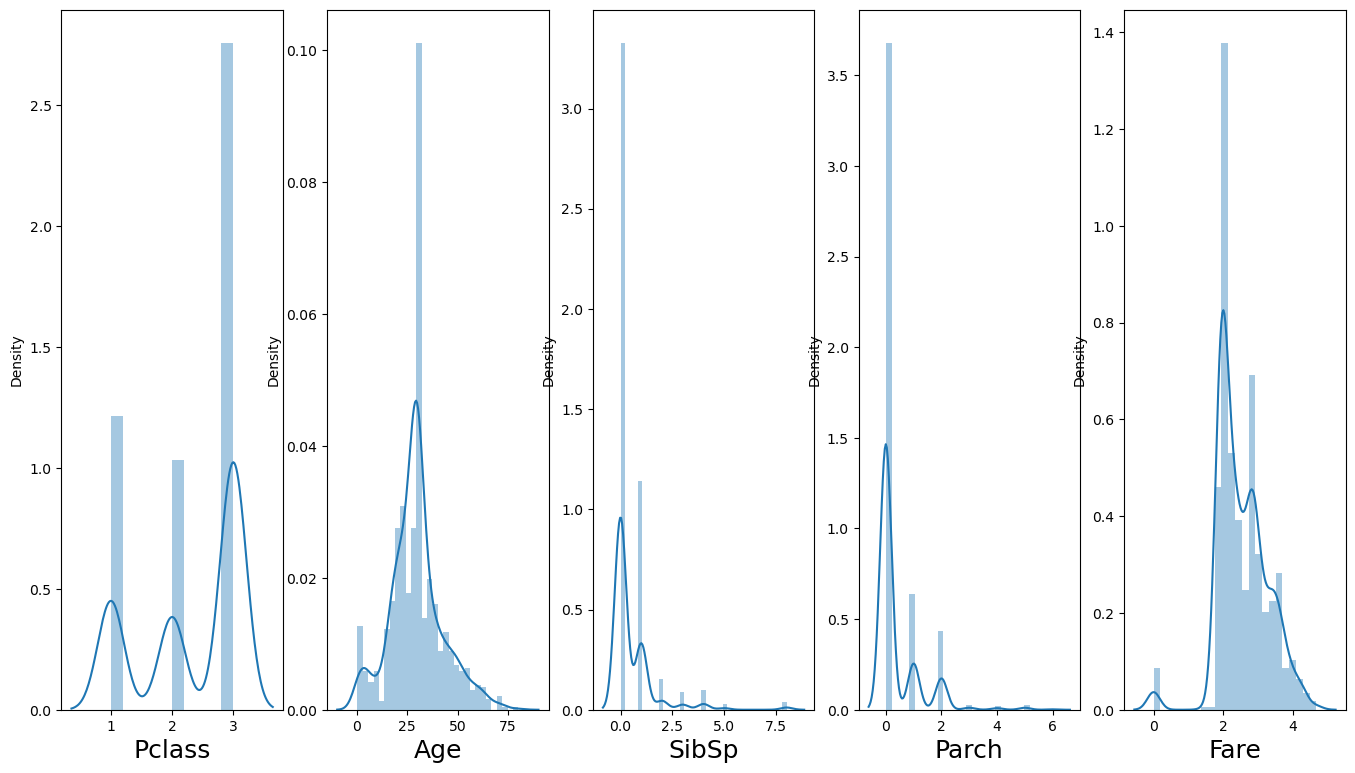

In [17]:
columns= ['Pclass','Age', 'SibSp','Parch', 'Fare']
plotnumber = 1
plt.figure(figsize=(20,20))
for column in columns:
    if plotnumber <= 6:
        ax = plt.subplot(2, 6, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=18)
        plotnumber += 1

plt.show()


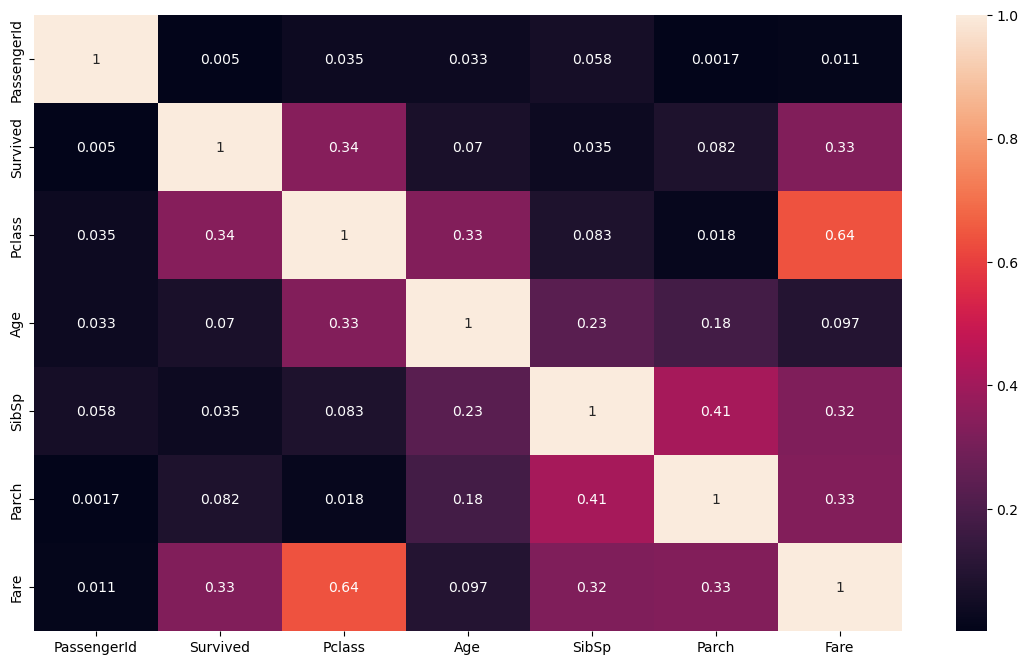

In [18]:
df_corr= data.corr().abs()
plt.figure (figsize=(14,8))
sns.heatmap(df_corr, annot=True,)
plt.show()

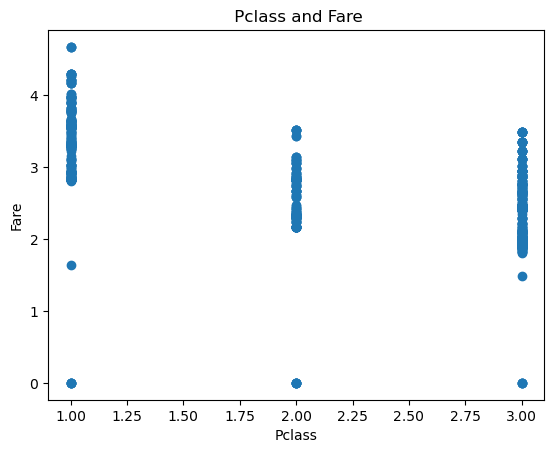

In [19]:
plt.scatter(data['Pclass'], data['Fare'])
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.title(' Pclass and Fare')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

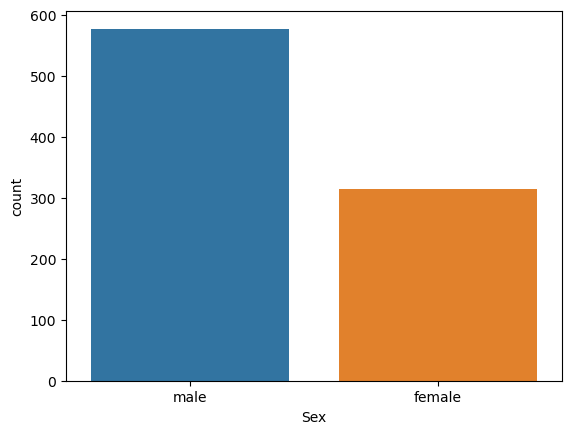

In [20]:
sns.countplot('Sex', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

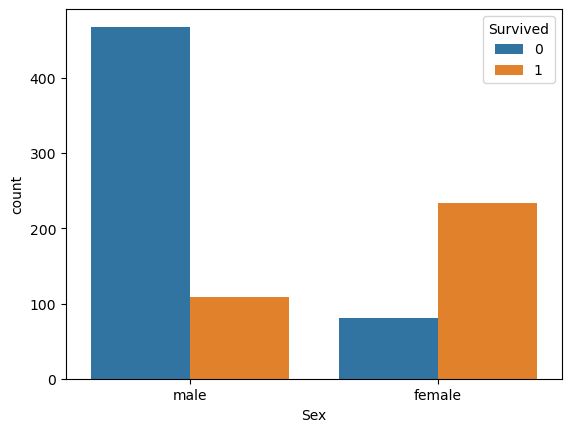

In [21]:
sns.countplot('Sex', hue='Survived', data=data)

In [22]:
unique_values = data['Age'].unique()
unique_values

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [23]:
len(unique_values)

89

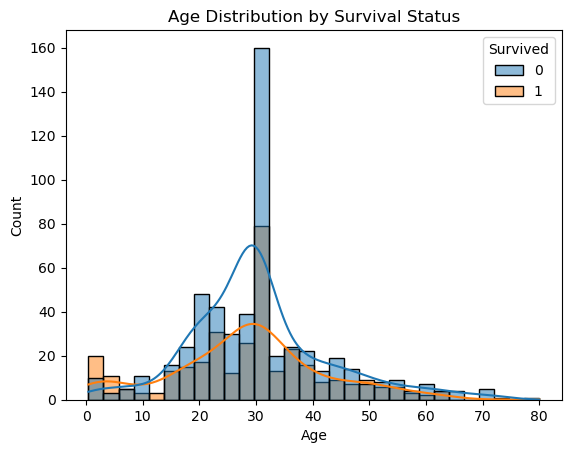

In [24]:
sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival Status')
plt.show()


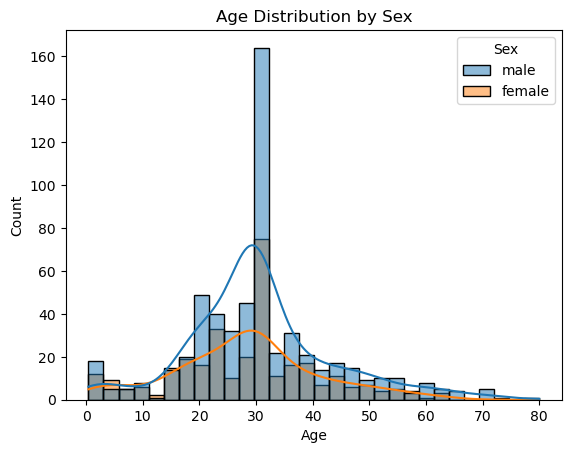

In [25]:
sns.histplot(data=data, x='Age', hue='Sex', kde=True)
plt.title('Age Distribution by Sex')
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='count'>

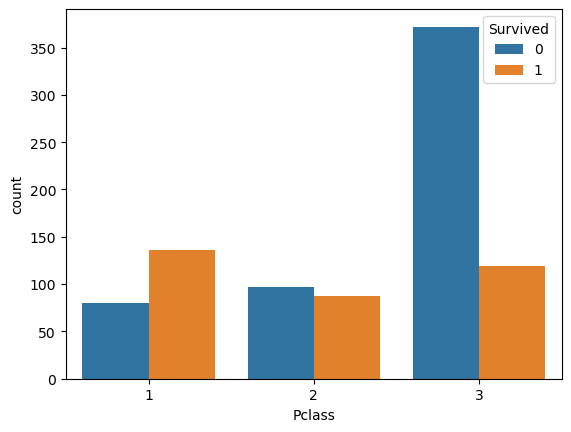

In [26]:
sns.countplot('Pclass', hue='Survived', data=data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

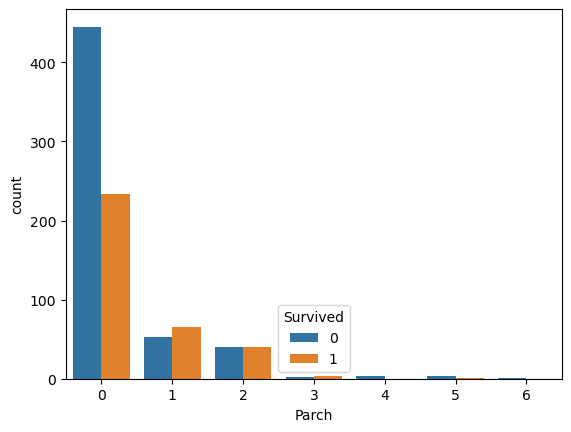

In [27]:
sns.countplot('Parch', hue='Survived', data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

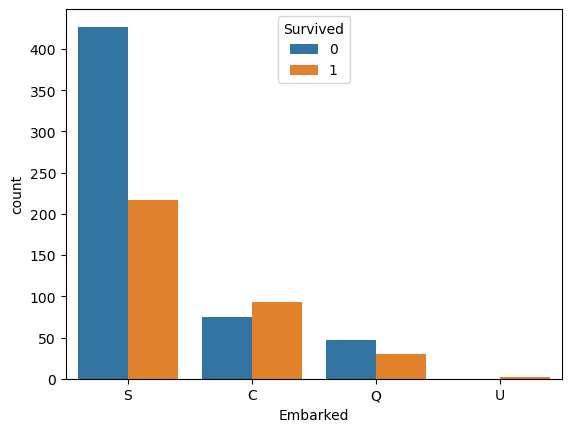

In [28]:
sns.countplot('Embarked', hue='Survived', data=data)

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [30]:
data = pd.get_dummies(data, columns=['Embarked'])

In [31]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.906724,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,3.497640,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,1.970459,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.304258,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,1.981680,0,0,1,0


In [32]:
data= data.drop (columns= ['Name', 'Ticket', 'PassengerId'], axis=1)

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(data)
x_scaled

array([[-0.78927234,  0.82737724,  0.73769513, ..., -0.30756234,
         0.61930636, -0.0474312 ],
       [ 1.2669898 , -1.56610693, -1.35557354, ..., -0.30756234,
        -1.61470971, -0.0474312 ],
       [ 1.2669898 ,  0.82737724, -1.35557354, ..., -0.30756234,
         0.61930636, -0.0474312 ],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ..., -0.30756234,
         0.61930636, -0.0474312 ],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -0.30756234,
        -1.61470971, -0.0474312 ],
       [-0.78927234,  0.82737724,  0.73769513, ...,  3.25137334,
        -1.61470971, -0.0474312 ]])

In [34]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,1.906724,0,0,1,0
1,1,1,0,38.0,1,0,3.497640,1,0,0,0
2,1,3,0,26.0,0,0,1.970459,0,0,1,0
3,1,1,0,35.0,1,0,3.304258,0,0,1,0
4,0,3,1,35.0,0,0,1.981680,0,0,1,0


In [35]:
x=data.drop (columns=['Survived'], axis=1)
y=data['Survived']

In [36]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.2, random_state= 4)

In [38]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81818182 0.77622378 0.79577465 0.76056338 0.77464789]
0.7850783019797104


In [40]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8041958  0.7972028  0.76760563 0.80985915 0.79577465]
0.794927607603664


In [46]:
from sklearn.metrics import make_scorer

rf = RandomForestClassifier()
lr = LogisticRegression()

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, scoring=make_scorer(accuracy_score), cv=5)
grid_search_lr = GridSearchCV(lr, param_grid_lr, scoring=make_scorer(accuracy_score), cv=5)

grid_search_rf.fit(x_train, y_train)
grid_search_lr.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_model_rf = grid_search_rf.best_estimator_
best_model_lr = grid_search_lr.best_estimator_

y_pred_rf = best_model_rf.predict(x_test)
y_pred_lr = best_model_lr.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"Best Random Forest Model - Hyperparameters: {best_params_rf}, Accuracy: {accuracy_rf}")
print(f"Best Logistic Regression Model - Hyperparameters: {best_params_lr}, Accuracy: {accuracy_lr}")


Best Random Forest Model - Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}, Accuracy: 0.8324022346368715
Best Logistic Regression Model - Hyperparameters: {'C': 0.1, 'penalty': 'l2'}, Accuracy: 0.8268156424581006


In [48]:
rf=RandomForestClassifier(n_estimators= 100, max_depth= None, min_samples_split= 10)
rf.fit(x_train, y_train)


RandomForestClassifier(min_samples_split=10)

In [49]:
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Model - Accuracy: {accuracy}")

Random Forest Model - Accuracy: 0.8435754189944135


In [51]:
from sklearn.metrics import classification_report
print ( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       119
           1       0.83      0.67      0.74        60

    accuracy                           0.84       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.84      0.84       179

